
# C. Advanced Visualization with Matplotlib

Matplotlib provides a lot more and better visualization methods and tools besides what we have seen in the previous lesson for drawing plain plots.  
Since the visualization process is one of the most substantial parts in the data analysis process,  
it's important to be able to select the right visualization method to convey the best possible picture on your data.<br/><br/>
In this section, we will be looking at other types of plotting tools than line charts for advanced data visualization.


### _Objective_
- **Visualization of categorical data**: Drawing bar and pie charts for categorical data.
- **Visualization of continuous data**: Drawing a histogram for continuous data
- **Visualization of continuous&categorical data**: Drawing a boxplot for distribution of a continuous variable for each of the categories (categorical variable)
- **Visualization of categorical&continuous data**: Drawing a scatter plot to display the relationship between two continuous variables x and y

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# \[1. Visualization of Categorical Data\]

####  Example Data) Student report card from the mid&final exams

In [2]:
mid_scores = np.array([
    [80,92,70,65,92],
    [91,75,90,68,85],
    [86,76,42,72,88],
    [77,92,52,60,80],
    [75,85,85,92,95],
    [96,90,95,81,72]
])

pd.DataFrame(mid_scores, columns = ['history' , 'english',  'math', 'social_studies', 'science'])

,history,english,math,social_studies,science
0,80,92,70,65,92
1,91,75,90,68,85
2,86,76,42,72,88
3,77,92,52,60,80
4,75,85,85,92,95
5,96,90,95,81,72


In [3]:
final_scores = np.array([
    [85,95,90,66,93],
    [93,70,80,60,81],
    [89,78,55,75,80],
    [80,94,59,72,90],
    [70,82,81,95,72],
    [90,76,93,82,89]
])
pd.DataFrame(final_scores, columns = ['history' , 'english',  'math', 'social_studies', 'science'])

,history,english,math,social_studies,science
0,85,95,90,66,93
1,93,70,80,60,81
2,89,78,55,75,80
3,80,94,59,72,90
4,70,82,81,95,72
5,90,76,93,82,89


In [4]:
scores = np.stack([mid_scores,final_scores])

scores

array([[[80, 92, 70, 65, 92],
        [91, 75, 90, 68, 85],
        [86, 76, 42, 72, 88],
        [77, 92, 52, 60, 80],
        [75, 85, 85, 92, 95],
        [96, 90, 95, 81, 72]],

       [[85, 95, 90, 66, 93],
        [93, 70, 80, 60, 81],
        [89, 78, 55, 75, 80],
        [80, 94, 59, 72, 90],
        [70, 82, 81, 95, 72],
        [90, 76, 93, 82, 89]]])

## 1. Bar Chart

A bar chart is a useful visualization tool used for comparing numeric values of different categories. It's primarily used to visualize categorical data. 


#### Example)  The average score for each midterm exam subject

First, create an array on average scores for each midterm subject

In [5]:
middle_avg_subject = mid_scores.mean(axis=0)
middle_avg_subject

array([84.16666667, 85.        , 72.33333333, 73.        , 85.33333333])

### (1) Vertical bar chart

- `plt.bar(x, height)`- `x` should represent the categories for the x-axis, and  `height` should show the value of each category on the y-axis.

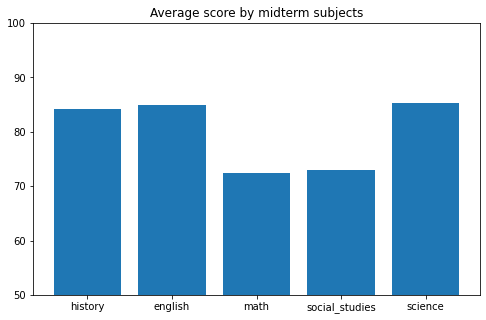

In [6]:
xs = ['history' , 'english',  'math', 'social_studies', 'science'] # x-axis labels

plt.figure(figsize = (8,5))

plt.bar(x = xs,                      # x: x-axis labels
        height = middle_avg_subject) # height: values of categories 

plt.title("Average score by midterm subjects")
plt.ylim(50,100)
plt.show()

### (2) Horizontal bar chart

- `plt.barh(y, width)` : `y` shows categories on the y-axis, and `width` for x-axis shows the numeric values of the categories

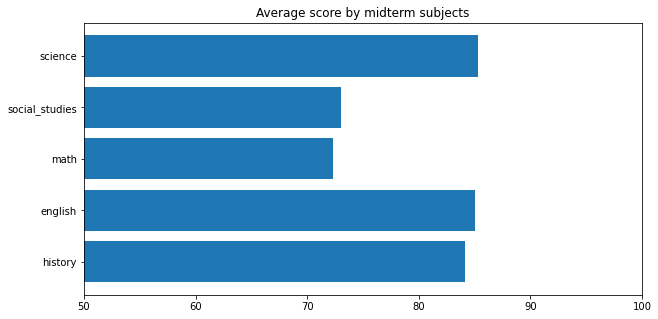

In [7]:
ys = ['history', 'english',  'math', 'social_studies', 'science']

plt.figure(figsize=(10,5))

plt.barh(y=ys,                     # y: y-axis labels 
         width=middle_avg_subject) # width: values of categories  

plt.title("Average score by midterm subjects")
plt.xlim(50,100)
plt.show()

### (3) Comparing two data groups by category
Using `plt.bar()` twice allows you to plot categorical variables of two data groups.  

Here, we'll compare average scores on the midterm and final exams by subject.

In [8]:
mid_avg_subject = mid_scores.mean(axis=0) # Average Score for each midterm subject 
final_avg_subject = final_scores.mean(axis=0)   # Average Score for each final subject

When drawing the two bars for comparison, you must set them not to overlap with each other.

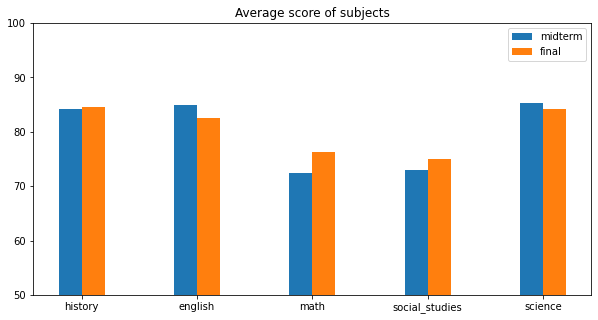

In [9]:
plt.figure(figsize=(10,5))

# Drawing a bar chart for the midterm average scores.
plt.bar(x=np.arange(0,5)-0.1,      # location of the bar - Move to the left by 0.1 
        height=middle_avg_subject, # height of the bar: Average scores by subject
        width=0.2)                 # width of the bar: 0.2

# Drawing a bar chart for the final exam average scores.
plt.bar(x=np.arange(0,5)+0.1,      # location of the bar: Move to the right by 0.1
        height=final_avg_subject,  # height of the bar: Average scores by subject
        width=0.2)                 # width of the bar:  0.2

plt.title("Average score of subjects")
plt.xticks(ticks=np.arange(0,5),
           labels=['history', 'english',  'math', 'social_studies', 'science']) # labelling each category
plt.ylim(50,100)
plt.legend(["midterm","final"])
plt.show()

## 2. Pie Chart

- `plt.pie(x, labels)`- plots the proportion of each category of the whole.<br>

A pie chart is a type of graph used to demonstrate how much each of the categories accounts for the whole.  
It is best to use when you are trying to compare parts of a whole, in percentages.

#### Example) Incorrect answer rate by subject

Let's visualize how much the score you missed for incorrect answers in each midterm subject takes up of the whole.

In [10]:
error_score = 100 - mid_scores[0] # calculating the scores student 0 missed in the midterm
error_score

array([20,  8, 30, 35,  8])

### (1) Drawing a pie chart

- `plt.pie(x, labels)`: Plot the proportion of each element value of x in a pie chart

Pie charts calculate the proportion of each category by using the sum of all values as the denominator  
and each value as the numerator, returning the result on a pie graph.

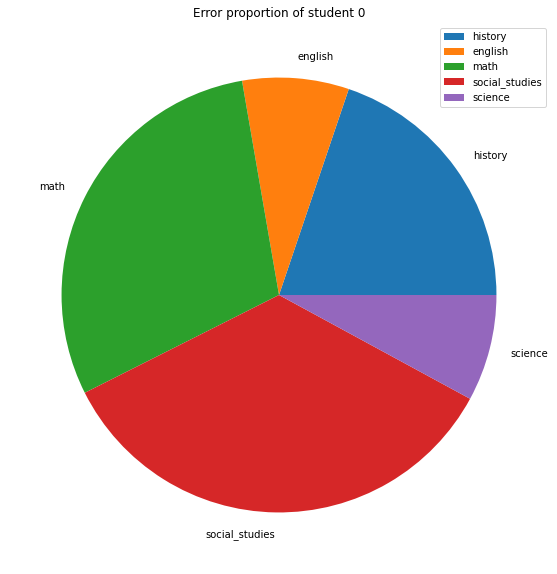

In [11]:
label_names = np.array(['history', 'english',  'math', 'social_studies', 'science'])
plt.figure(figsize=(10,10))

plt.pie(error_score,labels=label_names) # drawing a pie chart to see the proportion of each exam subject for incorrect answers
plt.title("Error proportion of student 0")
plt.legend()
plt.show()

### (2) Sorting pies

In the above pie graph, `error_score` is illustrated counterclockwise from the top right in the order each category was entered.

Let's sort the order by the size of pies. 

- `np.argsort(a)`: sorts elements of `a` based on their size/value and returns the indices that would sort an array

In [12]:
asc_idx = np.argsort(error_score)
asc_idx

array([1, 4, 0, 2, 3], dtype=int64)

It returned the indices that would sort `error_score` in ascending order from the smallest to the largest.  
We're now going to sort `error_score` as well as `label_names` based on `asc_idx`


In [13]:
sorted_score = error_score[asc_idx]
sorted_label = label_names[asc_idx]
print("sorting ", error_score, "to", sorted_score)
print("sorting ", label_names, "to", sorted_label)

sorting  [20  8 30 35  8] to [ 8  8 20 30 35]
sorting  ['history' 'english' 'math' 'social_studies' 'science'] to ['english' 'science' 'history' 'math' 'social_studies']


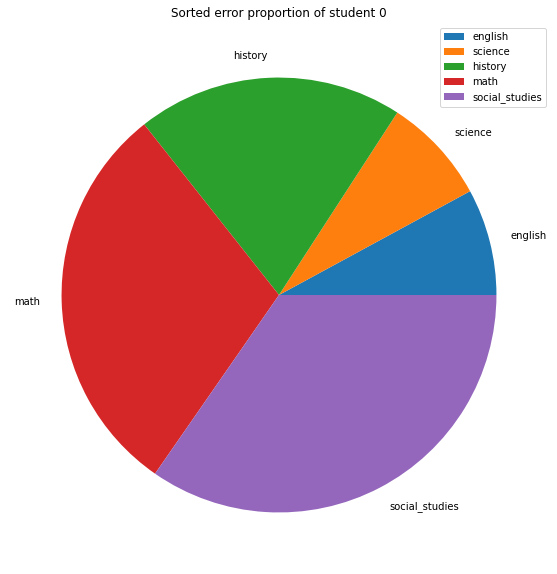

In [14]:
plt.figure(figsize=(10,10))

plt.pie(sorted_score, labels=sorted_label)

plt.title("Sorted error proportion of student 0")
plt.legend()
plt.show()

# \[2. Visualization of Continuous Variables\]

#### Example Data) Exam results in Math and Science 

In [15]:
math_scores = np.array([
       62, 80, 68, 61, 69, 62, 71, 84, 68, 71, 60, 72, 69, 78, 64, 73, 67,
       68, 58, 69, 64, 72, 59, 56, 60, 60, 78, 63, 68, 72, 72, 72, 70, 73,
       68, 55, 77, 73, 81, 71, 68, 63, 76, 76, 66, 70, 72, 67, 74, 66, 77,
       75, 68, 60, 71, 74, 78, 78, 69, 75, 71, 79, 75, 88, 81, 74, 85, 73,
       64, 78, 81, 68, 70, 62, 60, 69, 62, 81, 77, 85, 66, 68, 63, 81, 80,
       71, 78, 61, 70, 68, 69, 57, 64, 64, 65, 74, 69, 60, 75, 69, 66, 62,
       60, 75, 71, 63, 79, 62, 86, 86, 81, 74, 65, 71, 81, 67, 75, 77, 52,
       65, 68, 64, 60, 56, 67, 58, 83, 50, 77, 74, 76, 69, 69, 65, 64, 76,
       64, 74, 77, 66, 62, 46, 54, 69, 59, 55, 64, 71, 60, 95, 66, 76, 77,
       70, 61, 88, 55, 89, 76, 78, 68, 65, 65, 75, 79, 61, 65, 71, 81, 79,
       72, 77, 85, 58, 74, 83, 62, 77, 58, 61, 60, 74, 76, 64, 61, 63, 71,
       81, 57, 74, 75, 62, 59, 58, 53, 69, 83, 58, 58, 58, 65, 62, 73, 64,
       53, 75, 63, 64, 69, 75, 56, 61, 63, 72, 59, 54, 71, 66, 83, 72, 64
])
science_scores =  np.array([
       71, 77, 64, 55, 60, 64, 70, 87, 69, 76, 60, 80, 60, 72, 66, 69, 60,
       64, 68, 60, 68, 66, 64, 60, 61, 66, 80, 73, 60, 69, 76, 67, 70, 78,
       71, 56, 72, 82, 80, 75, 71, 64, 80, 74, 62, 72, 74, 57, 81, 68, 70,
       85, 63, 69, 70, 82, 83, 83, 67, 72, 69, 88, 70, 90, 83, 76, 79, 72,
       65, 86, 91, 71, 73, 54, 65, 71, 54, 85, 81, 92, 67, 76, 69, 75, 83,
       80, 80, 51, 69, 60, 68, 53, 57, 57, 65, 84, 63, 62, 84, 68, 74, 60,
       53, 67, 81, 69, 72, 56, 77, 91, 74, 78, 73, 69, 84, 67, 79, 74, 43,
       59, 77, 66, 69, 59, 64, 63, 79, 44, 70, 69, 71, 63, 66, 62, 72, 68,
       74, 82, 74, 67, 57, 41, 44, 64, 66, 55, 57, 70, 61, 88, 58, 76, 76,
       64, 54, 90, 65, 80, 70, 79, 75, 70, 58, 83, 75, 60, 66, 72, 75, 88,
       66, 82, 82, 59, 69, 82, 54, 73, 62, 56, 52, 77, 72, 62, 70, 53, 77,
       87, 51, 65, 85, 55, 55, 55, 50, 74, 82, 68, 54, 48, 68, 72, 77, 60,
       52, 66, 54, 54, 68, 73, 54, 53, 63, 74, 49, 50, 81, 59, 73, 78, 55
])

## 1. Histogram

The histogram is a useful visualization tool for showing the distribution(frequency of occurrences) of numerical data, mostly of continuous data. 

people sometimes mix up histograms and bar charts. However, they have distinct differences in the purpose of use.

- Bar chart - displays a categorical variable in the x-axis
- Histogram - displays a continuous variable in the x-axis, splitting the quantitative variable into bins while the y-axis shows how frequently each value of the x-axis occurs in the data.


- `plt.hist(x, bins)` - split a continuous variable into bins and draws the **frequency of occurrence of the values in each bin**.

### Drawing a histogram

Let's draw a histogram to see the distribution of exam scores in Math and Science.

In [1]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1,2,1)
ax.hist(math_scores, bins=20)    # grouping math scores into 20 bins of equal width between the smallest to the largest value
ax.set_title("Math distribution")
ax.set_xlim(40,100)

ax = fig.add_subplot(1,2,2)
ax.hist(science_scores, bins=20) # grouping science scores into 20 bins of equal width between the smallest to the largest value
ax.set_title("Science distribution")
ax.set_xlim(40,100)

plt.suptitle("Score distribution of whole students")
plt.show()

NameError: name 'plt' is not defined

# \[3. Visualization of Continuous Data X Categorical Data\]

## 1. Box Plot

What should we do if we want to compare the distribution of math and science scores in a single frame?
A box plot is the right visualization option.
- `plt.boxplot(x)`- summarises the distribution of a continuous variable using a box and whisker plot.

#### Example Data) Comparing the distribution of math and science scores 

Let's take a glance at math and science scores.

In [17]:
math_scores

array([62, 80, 68, 61, 69, 62, 71, 84, 68, 71, 60, 72, 69, 78, 64, 73, 67,
       68, 58, 69, 64, 72, 59, 56, 60, 60, 78, 63, 68, 72, 72, 72, 70, 73,
       68, 55, 77, 73, 81, 71, 68, 63, 76, 76, 66, 70, 72, 67, 74, 66, 77,
       75, 68, 60, 71, 74, 78, 78, 69, 75, 71, 79, 75, 88, 81, 74, 85, 73,
       64, 78, 81, 68, 70, 62, 60, 69, 62, 81, 77, 85, 66, 68, 63, 81, 80,
       71, 78, 61, 70, 68, 69, 57, 64, 64, 65, 74, 69, 60, 75, 69, 66, 62,
       60, 75, 71, 63, 79, 62, 86, 86, 81, 74, 65, 71, 81, 67, 75, 77, 52,
       65, 68, 64, 60, 56, 67, 58, 83, 50, 77, 74, 76, 69, 69, 65, 64, 76,
       64, 74, 77, 66, 62, 46, 54, 69, 59, 55, 64, 71, 60, 95, 66, 76, 77,
       70, 61, 88, 55, 89, 76, 78, 68, 65, 65, 75, 79, 61, 65, 71, 81, 79,
       72, 77, 85, 58, 74, 83, 62, 77, 58, 61, 60, 74, 76, 64, 61, 63, 71,
       81, 57, 74, 75, 62, 59, 58, 53, 69, 83, 58, 58, 58, 65, 62, 73, 64,
       53, 75, 63, 64, 69, 75, 56, 61, 63, 72, 59, 54, 71, 66, 83, 72, 64])

Just as what've done in the previous part, we first need to join `math_scores` and `science_scores`,  
and then transpose the stacked array to get an array as below.

In [18]:
m_s_scores = np.stack([math_scores, science_scores]).T
m_s_scores

array([[62, 71],
       [80, 77],
       [68, 64],
       [61, 55],
       [69, 60],
       [62, 64],
       [71, 70],
       [84, 87],
       [68, 69],
       [71, 76],
       [60, 60],
       [72, 80],
       [69, 60],
       [78, 72],
       [64, 66],
       [73, 69],
       [67, 60],
       [68, 64],
       [58, 68],
       [69, 60],
       [64, 68],
       [72, 66],
       [59, 64],
       [56, 60],
       [60, 61],
       [60, 66],
       [78, 80],
       [63, 73],
       [68, 60],
       [72, 69],
       [72, 76],
       [72, 67],
       [70, 70],
       [73, 78],
       [68, 71],
       [55, 56],
       [77, 72],
       [73, 82],
       [81, 80],
       [71, 75],
       [68, 71],
       [63, 64],
       [76, 80],
       [76, 74],
       [66, 62],
       [70, 72],
       [72, 74],
       [67, 57],
       [74, 81],
       [66, 68],
       [77, 70],
       [75, 85],
       [68, 63],
       [60, 69],
       [71, 70],
       [74, 82],
       [78, 83],
       [78, 83],
       [69, 67

Now, we can draw a box plot for each subject and compare the distribution of math/science scores by comparing the boxes with one another.

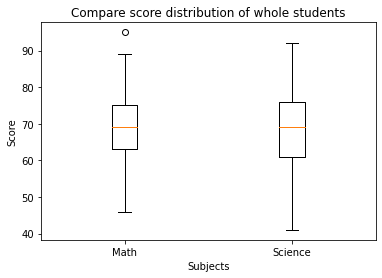

In [19]:
plt.boxplot(m_s_scores)

plt.title("Compare score distribution of whole students")
plt.ylabel("Score")
plt.xlabel("Subjects")
plt.xticks([1, 2], ['Math', 'Science'])
plt.show()

# \[4. Visualization of Continuous Data X Continuous Data\]

## 1. Scatter Plot 
A scatter plot is a type of plot used to display data for two variables.  
It is mostly used for determining the correlation between two continuous data(variables) or showing how much one variable is affected by another.

Unlike other plots that draw frequency or ratio, a scatter plot displays the position of the data within two variables.


- `plt.scatter(x,y)`: draws a scatter plot displaying values for two different continuous variables, each on the x and y-axis.

#### Example Data) Correlation between math and science scores

Let's find out how all students' math and science scores correlate with each other by drawing a scatter plot

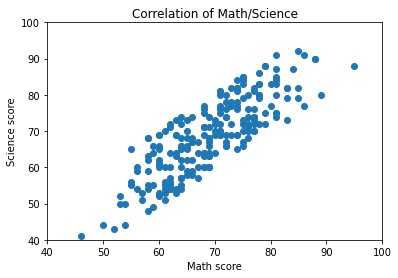

In [20]:
plt.scatter(x=math_scores,    # x: Math scores on x-axis
            y=science_scores) # y: Science scores on y-axis
                             
plt.title("Correlation of Math/Science")
plt.xlabel("Math score")
plt.ylabel("Science score")
plt.xlim(40,100)
plt.ylim(40,100)
plt.show()

Looking at the scatter plot, it seems that the math scores and science scores have a positive correlation.

Yet, it is not a good idea to judge the correlation only by looking at the plot,  
so you should look at the statistical figures such as the correlation coefficient and so on.